In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [3]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bXalan.csv to bXalan.csv


In [6]:
data = pd.read_csv('bXalan.csv')

In [9]:
data.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3,2,0,3,5,3,1,2,0,2.000000,...,0.0,0,0.5,0.555556,0,0,6.333333,2,1.3333,0
1,3,2,0,3,5,3,1,2,0,2.000000,...,0.0,0,0.5,0.555556,0,0,5.000000,2,1.0000,0
2,3,2,0,3,5,3,1,2,0,2.000000,...,0.0,0,0.5,0.555556,0,0,7.000000,2,1.3333,0
3,12,1,0,1,26,0,1,0,0,0.681818,...,0.5,2,0.0,0.409091,0,0,28.583333,10,2.5000,0
4,2,1,0,2,3,1,2,0,0,1.000000,...,0.0,1,0.0,1.000000,0,0,16.000000,2,1.0000,0


In [7]:
X= data.iloc[:,[7,13]].values
y=data.iloc[:,20].values


In [8]:
print(X)

[[ 2.          0.5       ]
 [ 2.          0.5       ]
 [ 2.          0.5       ]
 ...
 [ 9.          0.        ]
 [54.          0.46551724]
 [20.          0.52727273]]


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45107fa640>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f45107f6d90>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 190}


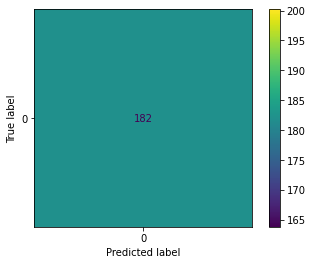

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
#import class you plan to use
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

#Fit the model with data (aka "model training")
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
